# RBRSolo processing

Run `rbrmoored` on a little test file. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
from pathlib import Path
import pyrsktools
import os

import gvpy as gv
import rbrmoored as rbr

%reload_ext autoreload
%autoreload 2
%autosave 300
%config InlineBackend.figure_format = 'retina'

Autosaving every 300 seconds


Path to .rsk file.

In [2]:
rbrdir = Path('../rbrmoored/tests/data/')

In [3]:
pwd

'/Users/gunnar/Projects/python/rbrmoored/notebooks'

Clock calibration

In [4]:
cal = np.datetime64('2020-10-12 16:52:00')

Processing parameters

In [5]:
data_out = Path('.')

already processed
reading netcdf file from
076611_20201012_1352.nc
time offset has already been applied


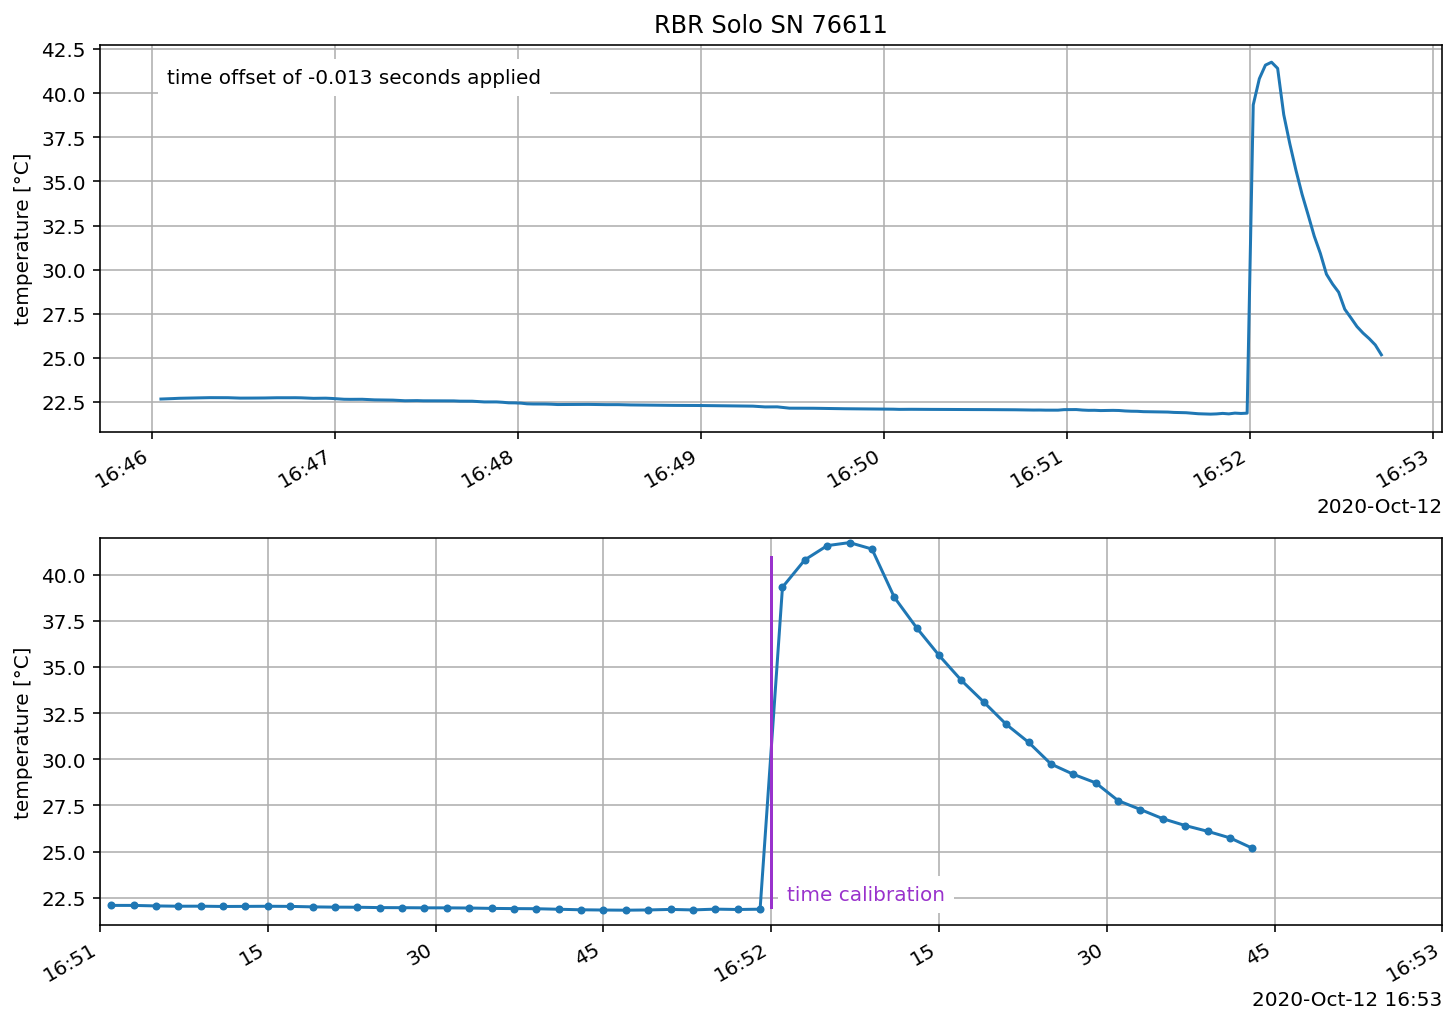

In [6]:
solofile = rbrdir.joinpath("076611_20201012_1352.rsk")
solo = rbr.solo.proc(solofile, data_out, figure_out=None, cal_time=cal, show_plot=True)

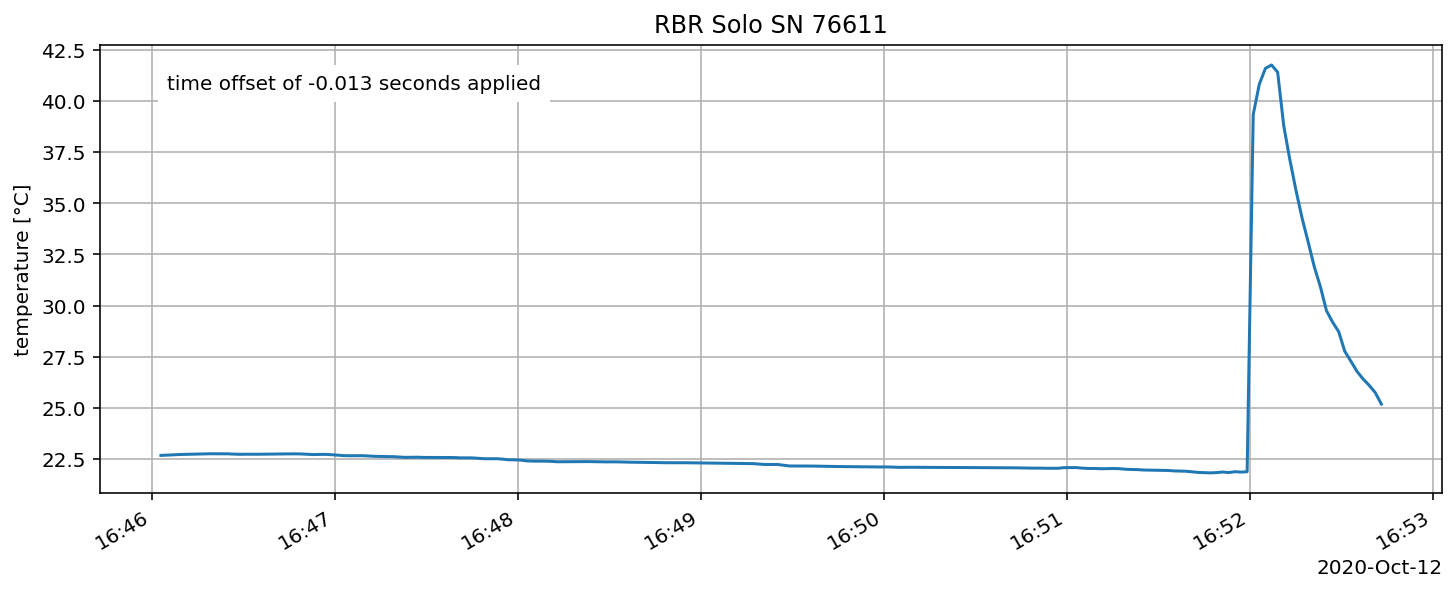

In [7]:
rbr.solo.plot(solo)

In [8]:
solo

<xarray.DataArray 't' (time: 201)>
array([22.673353, 22.684374, 22.699725, ..., 26.09767 , 25.739772, 25.180055])
Coordinates:
  * time     (time) datetime64[ns] 2020-10-12T16:46:03 ... 2020-10-12T16:52:4...
Attributes:
    units:                °C
    long_name:            temperature
    SN:                   76611
    model:                RBRsolo
    firmware version:     1.11
    file:                 076611_20201012_1352.rsk
    time drift in ms:     -13
    download time:        2020-10-12 16:52:49.194000+00:00
    sample size:          201
    sampling period:      2.0
    time offset applied:  1

In [9]:
rsk, data = rbr.solo.read_rsk(solofile)

reading SN 76611
